In [1]:
from pathlib import Path
import sys
sys.path.append("../..") # go to parent dir

import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
from aspects.analysis.aspect_ranking_correlation import get_spearman_and_kendalltau_correlations

In [4]:
correlations = get_spearman_and_kendalltau_correlations(1000)



Dataset to analyze: MicroMP3
TOP1000 Manually extracted aspects: ['player', 'sound', 'look', 'storage', 'size', 'features', 'touchpad', 'software', 'battery life', 'sound quality', 'design', 'interface', 'headphones', 'battery', 'accessories', 'FM reception', 'Zen micro', 'price', 'working', 'earbuds', 'touch pad', 'Zen Micro', 'audio quality', 'construction', 'firmware', 'bass', 'headphone jack', 'case', 'navigation', 'functioning', 'installation', 'FM tuner', 'belt clip', 'transfer speed', 'file transfer', 'support', 'extra features', 'organization', 'stand', 'ease of use', 'creative', 'bag', 'durability', 'format', 'looks', 'Zen', 'microphone', 'quality', 'feel', 'instruction', 'FM receiver', 'back', 'comfort', 'touchpad controls', 'radio', 'battery usage', 'cost', 'built', 'functionality', 'screen review', 'touch-pad', 'controls', 'portability', 'charging', 'scroll bar', 'user interface', 'small', 'color', 'Napster to go compatibility', 'file transfer/rip software', 'editing titl

IndexError: list index out of range

In [5]:
df = pd.DataFrame(correlations).T

NameError: name 'correlations' is not defined

In [12]:
df

,Jaccard,Kendall Tau Correlation,Kendall Tau p-value,Precision,Spearman Correlation,Spearman p-value
Canon PowerShot SD500,0.100437,0.360313,0.000045,0.302632,0.467373,2.076543e-05
Canon S100,0.110701,0.349110,0.000003,0.283019,0.452706,1.103072e-06
Diaper Champ,0.093023,0.260839,0.003448,0.263158,0.336735,2.936380e-03
Hitachi router,0.111554,0.254199,0.001203,0.291667,0.321721,1.391800e-03
Linksys Router,0.081886,0.380583,0.000001,0.358696,0.484584,9.847509e-07
MicroMP3,0.078797,0.247030,0.000004,0.265700,0.323294,2.019704e-06
Nokia 6600,0.107368,0.239394,0.000067,0.318750,0.314068,5.246902e-05
ipod,0.064394,0.171670,0.029172,0.369565,0.226861,2.965516e-02
norton,0.094241,0.231206,0.001211,0.315789,0.301733,1.104317e-03


Text(0.5,1,'Spearman and Kendall Tau Correlations for Bing Liu datasets \nmanually extracted aspects vs RST + pagerank-based rankings')

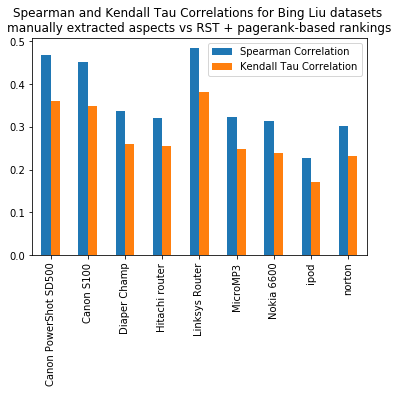

In [13]:
# top 10
df.plot(kind='bar', y=['Spearman Correlation', 'Kendall Tau Correlation'])
plt.title('Spearman and Kendall Tau Correlations for Bing Liu datasets \n'
          'manually extracted aspects vs RST + pagerank-based rankings')

Text(0.5,1,'Spearman and Kendall Tau Correlations [p-value] for Bing Liu datasets \nmanually extracted aspects vs RST + pagerank-based rankings')

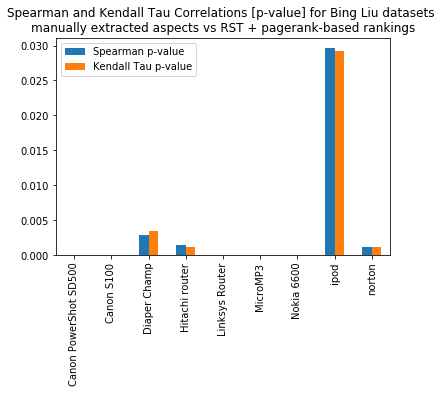

In [14]:
df.plot(kind='bar', y=['Spearman p-value', 'Kendall Tau p-value'])
plt.title('Spearman and Kendall Tau Correlations [p-value] for Bing Liu datasets \n'
          'manually extracted aspects vs RST + pagerank-based rankings')

In [15]:
from aspects.analysis.statistics_rst_graphs import get_aspect_ranking_based_on_rst_and_pagerank, ASPECTS_GRAPH_PATHS

In [16]:
all_aspects = []
all_texts_labels = []
for aspect_graph_path in ASPECTS_GRAPH_PATHS:
    dataset_name = Path(aspect_graph_path).parent.name
    print(dataset_name)
    aspects = get_aspect_ranking_based_on_rst_and_pagerank(aspect_graph_path, 50)
    all_aspects += aspects
    all_texts_labels += [dataset_name for _ in aspects]
    

ipod
Diaper Champ
norton
Linksys Router
MicroMP3
Canon S100
Canon PowerShot SD500
Nokia 6600
Hitachi router


In [17]:
from embedisualization.embedisualization import Embedisualisation
emb = Embedisualisation(texts=all_aspects, text_labels=all_texts_labels, num_clusters=5)
emb.create_d3_visualisation()

OSError: Can't find model 'en_vectors_web_lg'